# Final Project Submission
## Please fill out:

  *  Student name: Rwenji Murengaitta
  *  Student pace:  part time 
  *  Instructor name:Faith Rotich

# SYRIATEL CUSTOMER CHURN PREDICTION 

# 1. PROJECT OVERVIEW

## 1.1 Business Understanding

Keeping customers happy is really important for businesses, especially in the competitive telecommunications industry. In any business it is cheaper and easier to maintain the customer base than to add new customers. 

In line with customer retention we are developing a predictive model for SyriaTel that can predict which customers might leave. We're going to look at different kinds of information about the customers, like their location, how they use the service, if they have made any complaints, and their billing history. By doing this, we hope to find patterns and reasons why customers might leave.

We'll use this information to build a model that can tell us who is likely to leave. We'll carefully check how well the model works before using it. This way, SyriaTel can keep an eye on customers who might leave and work on retaining them. This helps the company avoid losing money from customers leaving.

## 1.2 Problem Statement


SyriaTel has experienced considerable financial setbacks as a result of a noticeable churn rate. The objective of this initiative is to develop an accurate predictive model that identifies customers at risk of churning within SyriaTel, a telecommunications company.

By proactively identifying potential instances of service discontinuation, the goal is to reduce customer attrition and maintain a larger customer base. Ultimately, this endeavor aims to help SyriaTel mitigate financial losses associated with churn, improve overall customer retention rates, and enhance business strategies to increase profitability.

## 1.3 Business Objectives

The business objectives of this project for SyriaTel are; 
* To comprehend the elements influencing customer churn,
* To foster customer loyalty,
* To improve overall customer retention.

# 2. DATA UNDERSTANDING

In [2]:
# Importing necessaries libraries

# Import modules & packages

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading data
data = pd.read_csv("telecom.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
#Shape of the dataframe
print("The number of rows: {}".format(data.shape[0]))

print("The number of columns:{}".format(data.shape[1]))

The number of rows: 3333
The number of columns:21


In [5]:
# List of columns in the dataset
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

Summary of the columns:

* *state*: The state of the customer.
* *account length*: The length of the account in days or months.
* *area code*: The area code of the customer's phone number.
* *phone number*: The phone number of the customer.
* *international plan*: Whether the customer has an international plan or not.
* *voice mail plan*: Whether the customer has a voicemail plan or not.
* *number vmail messages*: The number of voicemail messages the customer has.
* *total day minutes*: Total minutes of day calls.
* *total day calls*: Total number of day calls.
* *total day charge*: Total charge for the day calls.
* *total eve minutes*: Total minutes of evening calls.
* *total eve calls*: Total number of evening calls.
* *total eve charge*: Total charge for the evening calls.
* *total night minutes*: Total minutes of night calls.
* *total night calls*: Total number of night calls.
* *total night charge*: Total charge for the night calls.
* *total intl minutes*: Total minutes of international calls.
* *total intl calls*: Total number of international calls.
* *total intl charge*: Total charge for the international calls.
* *customer service calls*: Number of times the customer called customer service.
* *churn*: Whether the customer churned or not (True/False).

In [6]:
#General information for the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [7]:
# Descriptive statistics for numerical data 
data.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# 3 DATA CLEANING AND PREPARATION

In [8]:
# finding duplicates and missing values
duplicated = data.duplicated().sum()

missing_values = data.isna().sum()

print("Duplicated values are:", duplicated)
print("Missing values are:\n", missing_values)

Duplicated values are: 0
Missing values are:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


There are no duplicates and no missing values

In [9]:
# Check for the unique values in the data to differenciate between categorical and numerical data
data.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [10]:
#Cost seems to be broken down to into different times of the day/night. All these can be summed up to the new column "total cost"; cost for all customers 
data['total_cost'] = data['total day charge'] + data['total eve charge'] + data['total night charge'] + data['total intl charge']
data.drop(columns = ['total day charge' , 'total eve charge' , 'total night charge' , 'total intl charge'])
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_cost
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,60.10
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,63.53
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,67.74
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,13.57,139.2,137,6.26,5.0,10,1.35,2,False,57.53


In [11]:
#checking the data, "area code" appears to be categorical data, the are only 3 unique values
data['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

In [12]:
# Best is to convert the 'area code' column to an object (string) column. 
data['area code'] = data['area code'].astype(str)

In [13]:
# Checking categorical data
categorical_data = data.select_dtypes(include=["object","Bool"])
categorical_data.head()

,state,area code,phone number,international plan,voice mail plan,churn
0,KS,415,382-4657,no,yes,False
1,OH,415,371-7191,no,yes,False
2,NJ,415,358-1921,no,no,False
3,OH,408,375-9999,yes,no,False
4,OK,415,330-6626,yes,no,False


In [14]:
# numerical data
numeric_data =  data.select_dtypes("number")
numeric_data.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,total_cost
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,75.56
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,59.24
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,62.29
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,66.80
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,52.09


# 4 Exploratory Data Analysis

In [15]:
# Changing "churn" from bool to numerical
data["churn"] = data["churn"].map({True: 1, False: 0})
data.sample(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total_cost
1550,SC,106,408,330-4914,no,no,0,52.2,106,8.87,...,18.71,112.3,95,5.05,11.4,2,3.08,2,0,35.71
1871,IN,69,408,357-3577,no,no,0,185.3,91,31.50,...,18.62,243.6,107,10.96,5.5,5,1.49,0,0,62.57
1646,MN,173,510,372-7990,no,no,0,291.8,143,49.61,...,18.22,151.2,119,6.80,9.9,2,2.67,0,1,77.30
1522,ND,62,510,340-6339,no,no,0,159.9,100,27.18,...,14.64,263.2,109,11.84,5.6,4,1.51,1,0,55.17
2399,SD,121,415,392-2459,no,no,0,179.4,70,30.50,...,12.16,116.3,113,5.23,11.2,5,3.02,1,0,50.91
639,DE,106,415,419-3167,no,no,0,128.6,83,21.86,...,11.39,210.6,113,9.48,11.4,2,3.08,0,0,45.81
111,MA,103,415,337-4697,no,no,0,185.0,117,31.45,...,18.98,222.8,91,10.03,12.6,2,3.40,2,0,63.86
1864,MA,69,510,352-5000,no,no,0,195.1,91,33.17,...,22.23,203.8,90,9.17,11.4,5,3.08,0,0,67.65
1755,MO,80,408,405-4420,yes,yes,15,159.3,110,27.08,...,14.50,141.2,82,6.35,11.9,5,3.21,1,0,51.14
2993,OR,161,408,378-3879,no,no,0,196.6,73,33.42,...,14.47,194.3,79,8.74,12.5,3,3.38,1,0,60.01


### 4.1 Univariate Analysis

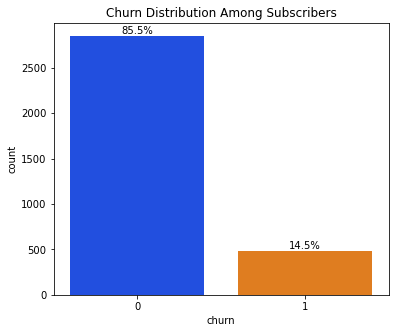

In [16]:
# Churn distribution among subscribers
#Setting size figure
plt.figure(figsize=(6, 5))
#Creating a countplot using seaborn
ax = sns.countplot(x='churn', data=data, palette='bright')
#Calc the total number of data points
total = len(data['churn'])

#Adding percentage annotation for each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

#Set title for plot
plt.title("Churn Distribution Among Subscribers")
plt.show()

Out of the 3,333 customers in the dataset, 483 have ended their contract, which is equal to 14.5% of customers lost. The distribution of the two categories (terminated and not terminated) in the data is uneven. It's important to fix this imbalance before creating a model because an uneven distribution can make the model give incorrect predictions.

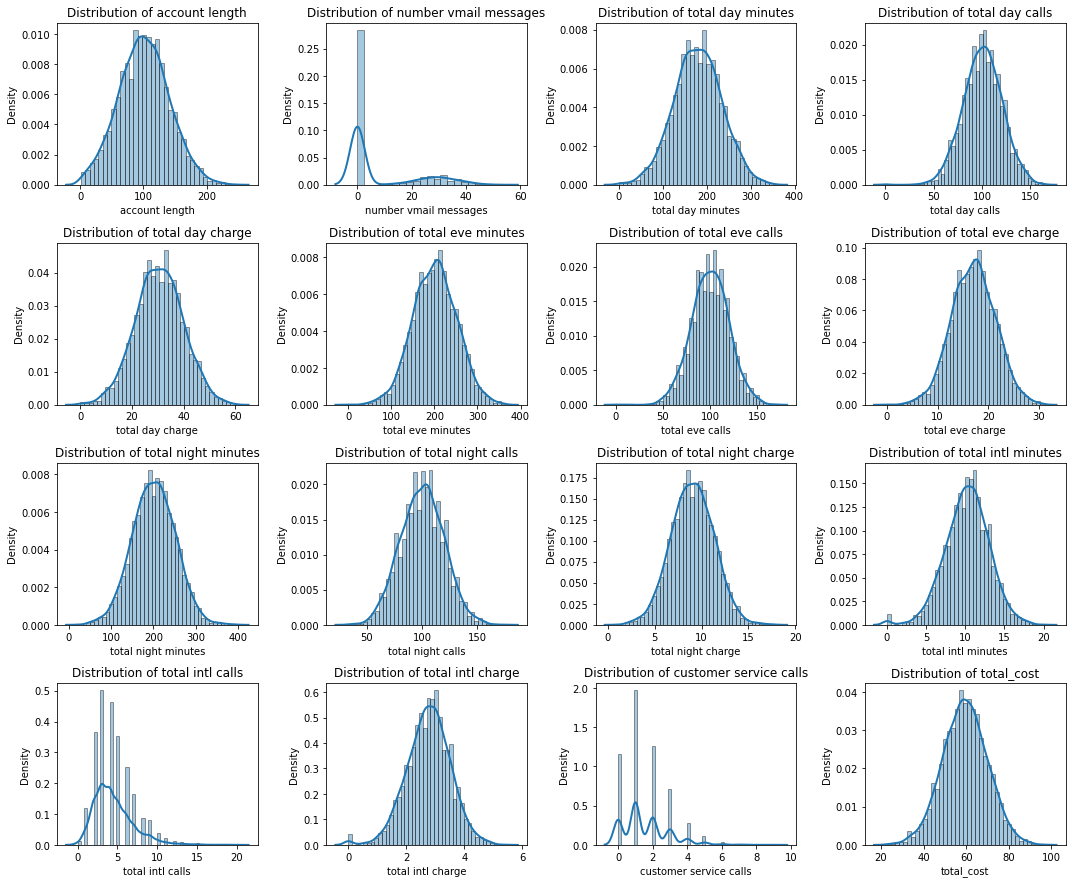

In [17]:
fig, axes = plt.subplots(5, 4, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(numeric_data.columns):
    sns.distplot(numeric_data[column], ax=axes[i], hist=True, kde=True, rug=False,
                 hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})
    axes[i].set_title(f"Distribution of {column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Density")

# Remove empty subplots if the number of columns is not a multiple of 4
if len(numeric_data.columns) < 20:
    for j in range(len(numeric_data.columns), 20):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Most of the distribution graphs depicted above exhibit a normal distribution, with the exception of the graphs for the number of voicemail messages, total international calls, and customer service calls, which are right-skewed.

In [18]:
categorical_features = categorical_data.drop(["phone number","churn"], axis = 1)
categorical_features.head()

,state,area code,international plan,voice mail plan
0,KS,415,no,yes
1,OH,415,no,yes
2,NJ,415,no,no
3,OH,408,yes,no
4,OK,415,yes,no


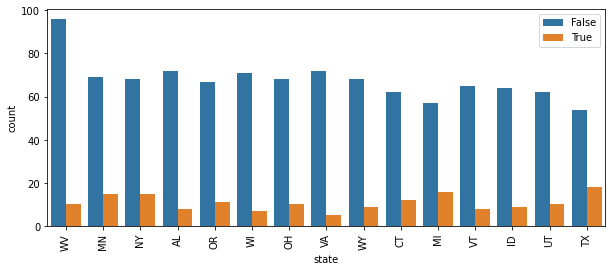

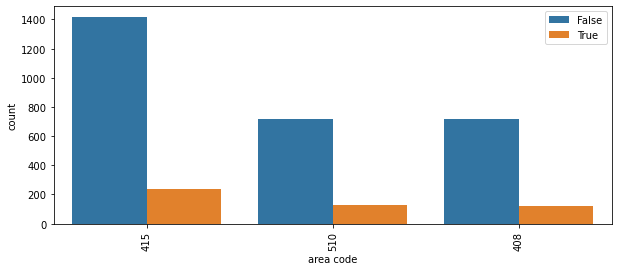

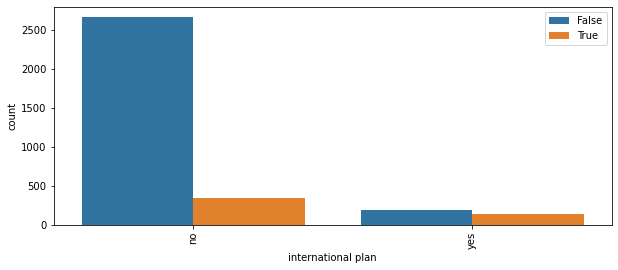

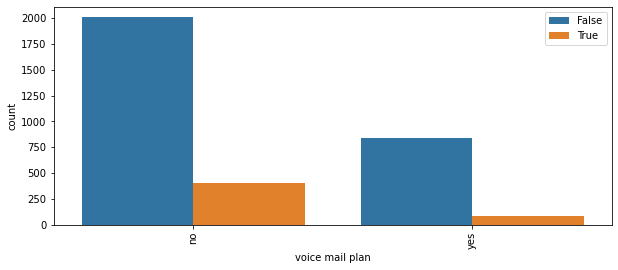

In [19]:
# comparing categorical data to "churn"
for i in categorical_features:
    plt.figure(figsize=(10,4))
    sns.countplot(x=i, hue="churn", data=categorical_data,order= categorical_features[i].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

### 4.2 Bivariate Analysis

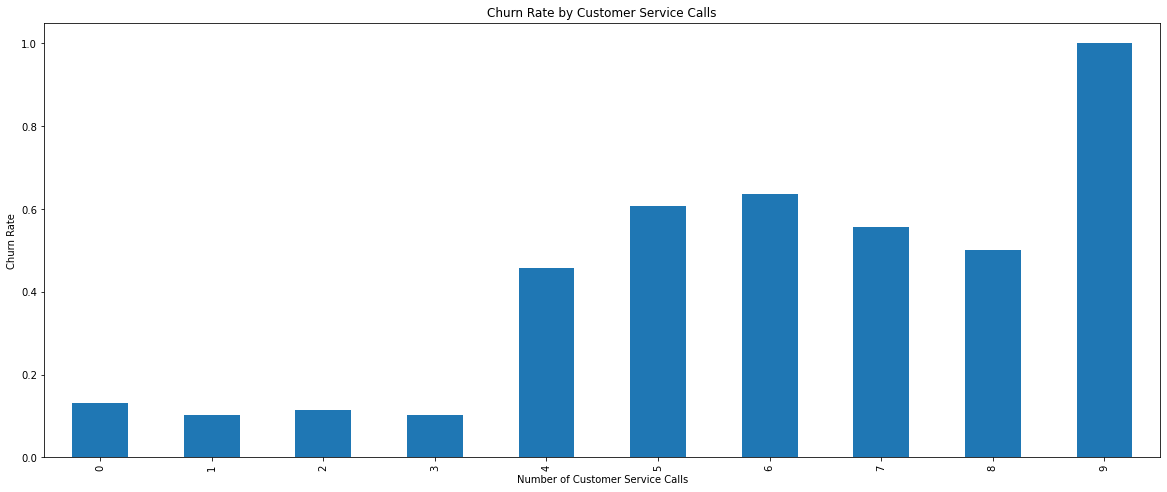

In [20]:
#relationship between customer service call and churn
fig, ax = plt.subplots(figsize=(20, 8))
data.groupby('customer service calls')['churn'].mean().plot.bar(ax=ax)
ax.set_title('Churn Rate by Customer Service Calls')
ax.set_xlabel('Number of Customer Service Calls')
ax.set_ylabel('Churn Rate')

# Display the plot
plt.show()

Customers exhibiting a high frequency of Customer Service Calls demonstrated elevated churn rates, suggesting a discernible correlation between the number of customer service calls and the likelihood of churn.

Frequent engagement with customer service may indicate unresolved issues, dissatisfaction, or frustration with the provided products or services. Consequently, such customers are more prone to terminating their association with the company, thereby contributing to increased churn rates.

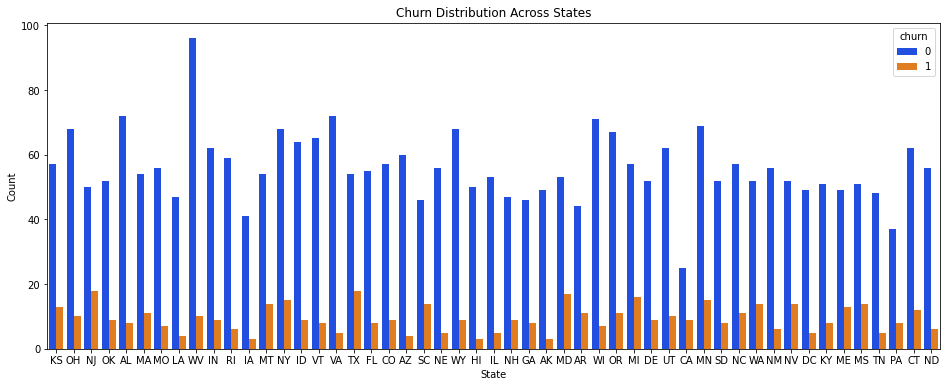

In [21]:
# Churn vs States

# Set a wider figure size
plt.figure(figsize=(16, 6))

# Create a bar plot
sns.countplot(x='state', hue='churn', data=data, palette='bright')

# Add titles and labels
plt.title('Churn Distribution Across States')
plt.xlabel('State')
plt.ylabel('Count')

# Show the plot
plt.show()

### 4.3 Multivariate Analysis

In [22]:
# Converting string-based categorical values to integer-based categorical representations
international_plan = {'yes': 1, 'no': 0}
voice_mail_plan = {'yes': 1, 'no': 0}

#Display the replacement of each column
data['international plan'].replace(international_plan, inplace=True)
data['voice mail plan'].replace(voice_mail_plan, inplace=True)


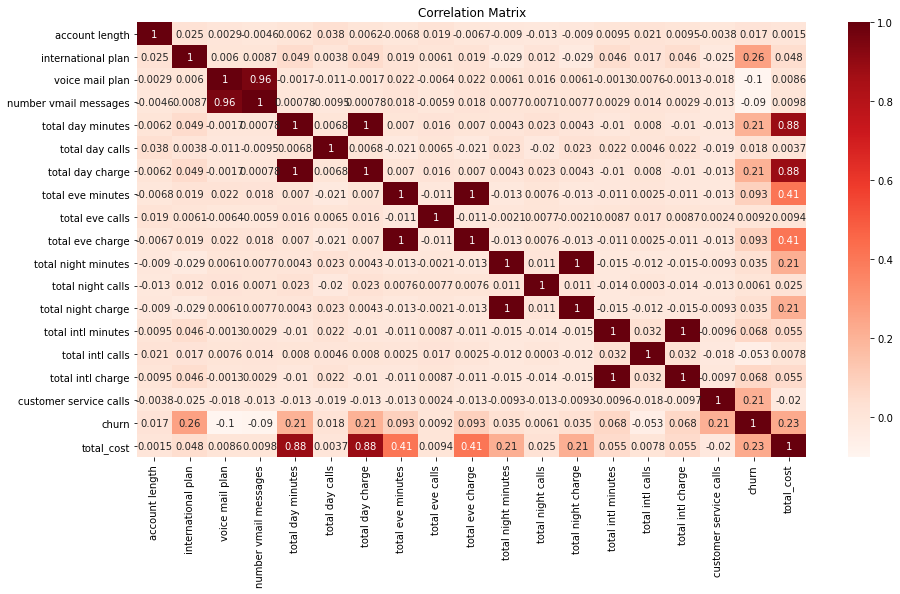

In [23]:
#Calculate the correlation matrix using the corr() method
correlation_matrix = data.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

The correlation between the following pairs of columns is 1:

* Total day minutes and total day charge
* Total eve minutes and total eve charge
* Total night minutes and total night charge
* Total intl minutes and total intl charge

Given the perfect correlation, it is advisable to drop one of the columns from each pair to address multicollinearity issues. Consequently, the following columns were dropped due to high multicollinearity:

* Total day minutes
* Total eve minutes
* Total night minutes
* Total intl minutes

In [24]:
df = data.drop(columns= ['total day minutes', 'total eve minutes', 'total night calls','total intl minutes','phone number' ], axis = 1)
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night charge,total intl calls,total intl charge,customer service calls,churn,total_cost
0,KS,128,415,0,1,25,110,45.07,99,16.78,244.7,11.01,3,2.70,1,0,75.56
1,OH,107,415,0,1,26,123,27.47,103,16.62,254.4,11.45,3,3.70,1,0,59.24
2,NJ,137,415,0,0,0,114,41.38,110,10.30,162.6,7.32,5,3.29,0,0,62.29
3,OH,84,408,1,0,0,71,50.90,88,5.26,196.9,8.86,7,1.78,2,0,66.80
4,OK,75,415,1,0,0,113,28.34,122,12.61,186.9,8.41,3,2.73,3,0,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,0,1,36,77,26.55,126,18.32,279.1,12.56,6,2.67,2,0,60.10
3329,WV,68,415,0,0,0,57,39.29,55,13.04,191.3,8.61,4,2.59,3,0,63.53
3330,RI,28,510,0,0,0,109,30.74,58,24.55,191.9,8.64,6,3.81,2,0,67.74
3331,CT,184,510,1,0,0,105,36.35,84,13.57,139.2,6.26,10,1.35,2,0,57.53


# 5. MODELLING

##### a. Onehote encoding the remaining categorical variables to convert into numerical data for modelling

In [25]:
#Onehote encoding for our categorcial features
df = pd.get_dummies(df, columns=['state', 'area code'], drop_first=True)
df.sample(10)


,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
3000,87,0,0,0,109,37.94,86,10.84,289.3,13.02,...,0,0,0,0,0,0,0,0,0,1
750,146,0,1,32,80,26.18,91,15.77,148.2,6.67,...,0,0,0,0,0,0,0,0,1,0
1240,108,0,1,34,83,27.56,117,14.60,259.8,11.69,...,0,0,0,0,0,0,0,0,0,1
813,166,0,0,0,103,29.56,83,23.49,190.8,8.59,...,0,0,0,0,0,1,0,0,0,1
50,52,0,0,0,108,32.62,96,22.93,236.8,10.66,...,0,0,0,0,0,0,0,0,0,0
1883,140,0,1,28,77,26.71,97,14.65,184.5,8.30,...,0,0,0,0,0,0,0,0,0,1
1819,117,0,1,17,82,37.62,100,14.25,262.7,11.82,...,0,0,0,0,0,0,0,0,1,0
754,41,0,0,0,105,35.68,105,10.36,253.7,11.42,...,0,0,0,0,0,0,0,0,1,0
3054,141,0,0,0,126,31.47,98,19.81,152.2,6.85,...,0,0,0,0,0,0,0,0,1,0
2055,82,0,0,0,101,33.61,83,10.85,142.1,6.39,...,0,0,0,0,0,0,0,0,1,0


#### b. Scaling the data to the same range to get rid of extreme values

In [26]:
#Scale the transform the data to avoid any interference from outliers
scaler = MinMaxScaler()

#iterate over the numerical columns in the data_copy set a scale of -1 to 1
def scaling(columns):
    return scaler.fit_transform(df[columns].values.reshape(-1,1))
for i in df.select_dtypes(include=[np.number]).columns:
    df[i] = scaling(i)
df.head(10)

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night minutes,total night charge,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_415,area code_510
0,0.524793,0.0,1.0,0.490196,0.666667,0.755701,0.582353,0.542866,0.595750,0.595935,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.438017,0.0,1.0,0.509804,0.745455,0.460597,0.605882,0.537690,0.621840,0.622236,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.561983,0.0,0.0,0.000000,0.690909,0.693830,0.647059,0.333225,0.374933,0.375374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.342975,1.0,0.0,0.000000,0.430303,0.853454,0.517647,0.170171,0.467187,0.467424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.305785,1.0,0.0,0.000000,0.684848,0.475184,0.717647,0.407959,0.440290,0.440526,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.483471,1.0,0.0,0.000000,0.593939,0.636821,0.594118,0.606600,0.486014,0.486551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.495868,0.0,1.0,0.470588,0.533333,0.621898,0.635294,0.958266,0.509414,0.509863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.603306,1.0,0.0,0.000000,0.478788,0.447518,0.552941,0.283403,0.507262,0.507472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.479339,0.0,0.0,0.000000,0.587879,0.525989,0.470588,0.967001,0.518020,0.518231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.578512,1.0,1.0,0.725490,0.509091,0.737089,0.652941,0.610482,0.815492,0.815900,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


##### c. Defining dependent and independent variables and creating train test split

In [27]:
#Defining X(independent variables) and y(target variable)
X = df.drop("churn", axis=1)
y = df["churn"]

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

##### d. Dealing with class Inbalance


SMOTE, or Synthetic Minority Oversampling Technique, is an oversampling method designed to address the overfitting issue associated with random oversampling. Instead of simply replicating minority class examples, SMOTE generates synthetic samples for the minority class by focusing on the feature space. This is achieved through interpolation between neighboring positive instances, aiming to balance the class distribution in a more effective manner.

In [28]:
#instantiate SMOTENC
from imblearn.over_sampling import SMOTE, SMOTENC

smote = SMOTENC(categorical_features = [1,2],random_state = 12)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)

#### e. Defining a function for generating a confusion matrix for each model

In [29]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

## 5.1 Logistic Regression

Logistic regression is a statistical model employed in binary classification tasks. It falls under the category of regression analysis, specifically designed for scenarios where the dependent variable is binary. The objective of logistic regression is to gauge the probability of an instance belonging to a particular class, utilizing the values of the independent variables.

In [30]:
#Instantiating a logistic regression
logreg =LogisticRegression(random_state=12)
#fit the model
logreg.fit(resampled_X_train, resampled_y_train)
#predict on the labels
y_pred_log = logreg.predict(X_test)

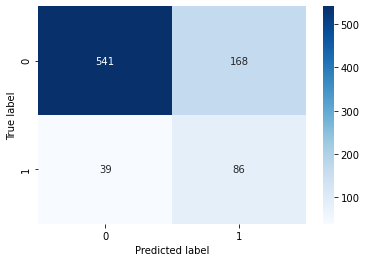

In [31]:
plot_confusion_matrix(y_test, y_pred_log, [0,1])

In [32]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

         0.0       0.93      0.76      0.84       709
         1.0       0.34      0.69      0.45       125

    accuracy                           0.75       834
   macro avg       0.64      0.73      0.65       834
weighted avg       0.84      0.75      0.78       834



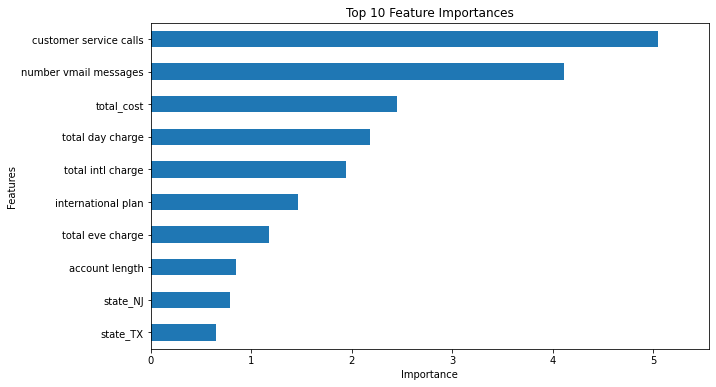

In [33]:
# Feature Importances
importance = logreg.coef_[0]
feature_names = resampled_X_train.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  # Select the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)  # Set the xlim to the maximum importance value
plt.show()

The logistic regression model demonstrates a recall score of 0.76 for no churn and 0.69 for churn, which is okay for a baseline model. This implies that the model can accurately identify approximately 76% of true nagatives (no churn) from the model and 69% of the true positive instances (churn).

Upon evaluating the confusion matrix, it became evident that the model achieved a greater count of true positives and true negatives compared to false positives and false negatives. This suggests that the model consistently makes accurate predictions, minimizing the occurrence of incorrect ones and avoiding overfitting.

The 75% accuracy score is good but not good enough and will therefore, try another model.

As per the model, the top three most influential features are customer service calls, number of vmail messages and total cost.


## 5.2 Decision Tree



It's a supervised machine learning method for data classification. Decision trees divide the data into progressively smaller subsets until each subset consists solely of one class. To predict the class of a new data point, the decision tree follows the path down the tree aligned with the values of its features.

In [34]:
#create an instance of the decision tree
dt_clf = DecisionTreeClassifier(random_state=12)
#Fit on the training data
dt_clf.fit(resampled_X_train,resampled_y_train)

#predict on the test set
y_pred_dt = dt_clf.predict(X_test)

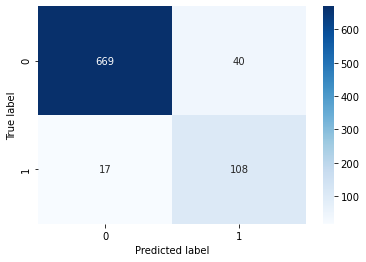

In [35]:
plot_confusion_matrix(y_test, y_pred_dt, [0,1])

In [48]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       709
         1.0       0.73      0.86      0.79       125

    accuracy                           0.93       834
   macro avg       0.85      0.90      0.88       834
weighted avg       0.94      0.93      0.93       834



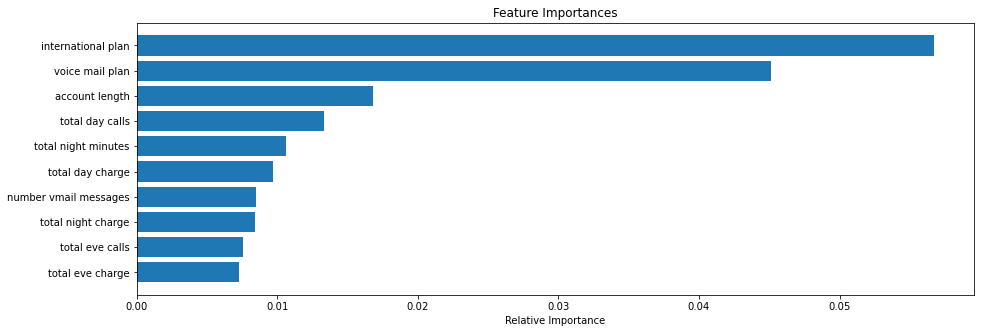

In [37]:
column_names = list(resampled_X_train.columns)
importances = dt_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(15,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], align= 'center')
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



The decision tree model exhibits a respectable recall score of 0.94 for no churn, and 0.86 for churn. This is a great improvement from our baseline model. This signifies that the model is capable of correctly identifying approximately 86% of the actual positive instances.

The model has an accuracy score of 93% which is significantly higher than that of the baseline model.

Upon analyzing the confusion matrix, it was observed that the model achieved more true positives and true negatives compared to false positives and false negatives. This suggests that the model consistently makes accurate predictions, indicating a lack of overfitting.

According to the model, the three most crucial features are number of vmail messages, voice mail plan and international plan.

## 5.3 Random Forest

In [38]:
#Instantiate the classifier
rf = RandomForestClassifier(random_state=12)
#Fit on the training data
rf.fit(resampled_X_train,resampled_y_train)

RandomForestClassifier(random_state=12)

In [39]:
#predict on the test data
y_pred_rf = rf.predict(X_test)

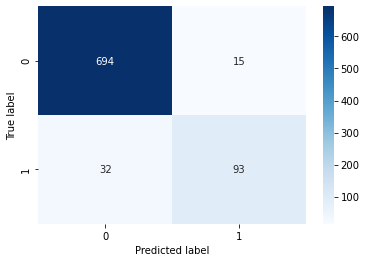

In [40]:
#rf confusion matrix
plot_confusion_matrix(y_test, y_pred_rf,[0,1])

In [41]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       709
         1.0       0.86      0.74      0.80       125

    accuracy                           0.94       834
   macro avg       0.91      0.86      0.88       834
weighted avg       0.94      0.94      0.94       834



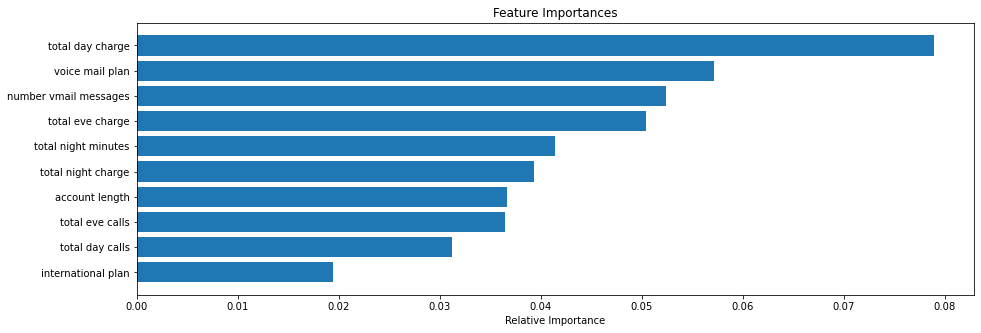

In [42]:
column_names = list(resampled_X_train.columns)
importances = rf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(15,5))
plt.title('Feature Importances')
plt.barh(range(len(indices)),importances[indices], align= 'center')
plt.yticks(range(len(indices)), [column_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The random forest classifier model demonstrates an impressive recall score of 0.74. This implies that the model can accurately identify approximately 74% of the actual positive instances.

An examination of the confusion matrix revealed that the model achieved a greater count of true positives and true negatives in comparison to false positives and false negatives. This suggests that the model consistently makes accurate predictions, indicating a lack of overfitting.

As per the model's analysis, the top three most influential features are total day charge, voice mail plan and number of vmail messages.

# 6. EVALUATION

## 6.1 Recall Score

In [43]:
np.random.seed(12)

classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]

# Define a result table as a DataFrame
recall_results = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    recall_results = recall_results.append({'classifiers': cls.__class__.__name__,
                                        'recall': recall}, ignore_index=True)

# Set name of the classifiers as index labels
recall_results.set_index('classifiers', inplace=True)

recall_results

,recall
classifiers,
LogisticRegression,0.688
RandomForestClassifier,0.744
DecisionTreeClassifier,0.888


## 6.2 ROC Analysis

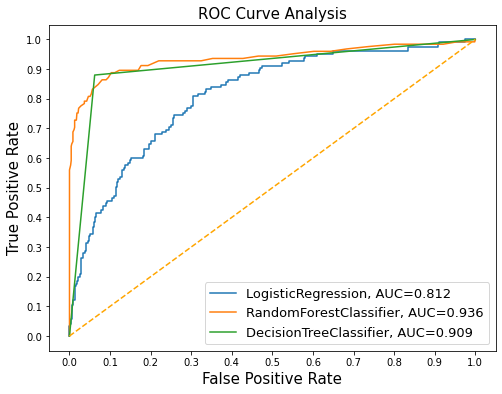

In [44]:
np.random.seed(123)
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()


The analysis of the ROC curve reveals that the Random Forest classifier exhibits the most superior performance, followed by DecisionTreeClassifier, and LogisticRegression. The "Random Forest classifier attains the highest AUC score of 0.936, whereas the LogisticRegression has the lowest AUC score of 0.812.

The ROC curve is a graphical representation illustrating the balance between the true positive rate (TPR) and the false positive rate (FPR) for a binary classifier. The TPR signifies the proportion of correctly classified positive instances, while the FPR represents the proportion of incorrectly classified negative instances. The AUC, or area under the ROC curve, serves as a comprehensive measure of the classifier's overall performance.

A heightened AUC score indicates that the classifier excels in distinguishing between positive and negative instances.

## 6.3 Model Tuning

After assessing the models through recall scores and ROC AUC, it becomes evident that the RandomForest classifier exhibits promising performance. To enhance its effectiveness further, one can implement model tuning by utilizing GridSearch.

In [45]:
#Tuning RandomForestClassification

#Define the grid
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [15, 20, 35],
    "min_samples_split":[5, 10, 15],
    "min_samples_leaf":[2, 4, 10],
    "criterion":['entropy','gini']
}

#Create a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(random_state=12)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring="recall", cv=3, n_jobs=-1)
grid_search.fit(resampled_X_train, resampled_y_train)
best_params = grid_search.best_params_
best_rf_classifier = grid_search.best_estimator_
#Evaluate
y_pred_grid = best_rf_classifier.predict(X_test)
#Display the best parameters
print("Best Parameters:", best_params)

#Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_grid))

Best Parameters: {'criterion': 'entropy', 'max_depth': 35, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       709
         1.0       0.85      0.77      0.81       125

    accuracy                           0.94       834
   macro avg       0.90      0.87      0.89       834
weighted avg       0.94      0.94      0.94       834



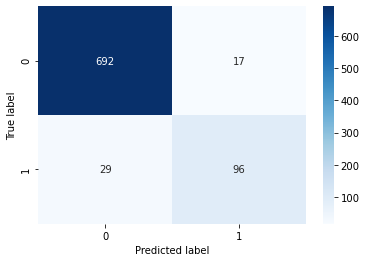

In [46]:
#Confusion matrix
plot_confusion_matrix(y_test, y_pred_grid,[0,1])

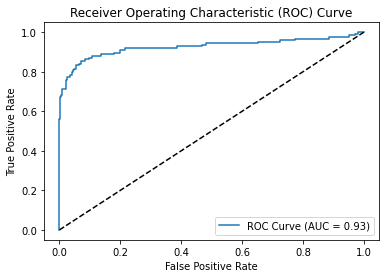

In [47]:
# Get the predicted probabilities for the positive class
y_prob_grid = best_rf_classifier.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_grid)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_prob_grid)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Based on the ROC curve and the recall metric, the tuned Random Forest model performs well in distinguishing between positive and negative classes (churned and non-churned customers) and in correctly identifying churned customers.The model has a recall score of 0.77, which means model is able to capture 77% of the actual churned customers.

# 7. Conclusion

The random forest emerged as the top-performing model for two key reasons. Firstly, it demonstrated a notable recall score of 0.77, indicating a 77% accuracy in identifying customers at risk of churn. This aligns perfectly with our goal of effectively recognizing and addressing churn.

The random forest model exhibited a commendable accuracy score of 0.94, signifying a 94% success rate in correctly classifying churn cases. This high accuracy underscores the model's effectiveness in predicting churn accurately, a critical factor for informed business decision-making.

The model's impressive ability to harmonize precision and recall is evident in its F1 score of 0.81. Combining these metrics into a single measure, the F1 score reflects a balanced evaluation of the model's performance. With a higher F1 score, the random forest model efficiently identifies true positives while minimizing both false positives and false negatives. In our context, the F1 score of 0.81 underscores the model's adeptness at striking a precise balance between precision and recall, ensuring accurate identification of churn cases.


## 8. Recommendations 

SyriaTel can improve customer retention by: 
* Using the Random Forest Classifier for predicting churn in real-time. Regularly monitoring the model ensures it stays effective, with updates adjusting to changing customer behaviors
* Analyzing feature importance helps identify areas for targeted service improvements and personalized retention efforts. What is obderved is that call cost, duration of calls and charges related to voice mail services have a huge impact on the churn rate. having better incentives for categories of customers who use this services are more likely to reduce churn.
* Work closely with retention teams ensures smooth integration and informed decision-making. 
* By combining quantitative predictions with qualitative customer feedback, SyriaTel gains a thorough understanding for crafting nuanced retention strategies.
* Continuous model enhancements and investments in customer experience initiatives contribute to long-term success, optimizing resource allocation and nurturing lasting relationships in the telecommunications industry.